# Penguin Dataset EDA
44608 Week 5 Project
Author: Scott Williamson
Date: 06/03/24
Purpose: Demonstate skills with Jupyter and EDA. Will look at the seaborn penguin dataset for any trends or correlations. Look at how characteristics vary by species, island, and sex.

## Importing Libraries

In [402]:
## Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Inspect Data

In [403]:
# Load dataset into DataFrame
df = sns.load_dataset('penguins')

# Inspect first rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


There are the following columns in the dataset: 
- Species
- Island
- Bill Length(mm)
- Bill Depth(mm)
- Flipper Length(mm)
- Body Mass(mm)
- Sex



In [404]:
## Initial data inspection
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


## Clean Data
- Rename columns
- Look for null values and remove

In [405]:
#Rename Columns
df.rename(columns={'bill_length_mm': 'Bill Length'}, inplace=True)
df.rename(columns={'bill_depth_mm': 'Bill Depth'}, inplace=True)
df.rename(columns={'flipper_length_mm': 'Flipper Length'}, inplace=True)
df.rename(columns={'body_mass_g': 'Body Mass'}, inplace=True)
df.rename(columns={'species': 'Species'}, inplace=True)
df.rename(columns={'island': 'Island'}, inplace=True)
df.rename(columns={'sex': 'Sex'}, inplace=True)


In [406]:
#Look for null values
df.isnull().sum()

Species            0
Island             0
Bill Length        2
Bill Depth         2
Flipper Length     2
Body Mass          2
Sex               11
dtype: int64

In [407]:
#Drop null rows
df.dropna(inplace=True)

## Descriptive Statistics

In [408]:
## Print Descriptive Statistics
print(df.describe())

       Bill Length  Bill Depth  Flipper Length    Body Mass
count   333.000000  333.000000      333.000000   333.000000
mean     43.992793   17.164865      200.966967  4207.057057
std       5.468668    1.969235       14.015765   805.215802
min      32.100000   13.100000      172.000000  2700.000000
25%      39.500000   15.600000      190.000000  3550.000000
50%      44.500000   17.300000      197.000000  4050.000000
75%      48.600000   18.700000      213.000000  4775.000000
max      59.600000   21.500000      231.000000  6300.000000


- Not seeing any unusual data or major outliers in the data.

## Distribution of Characteristics

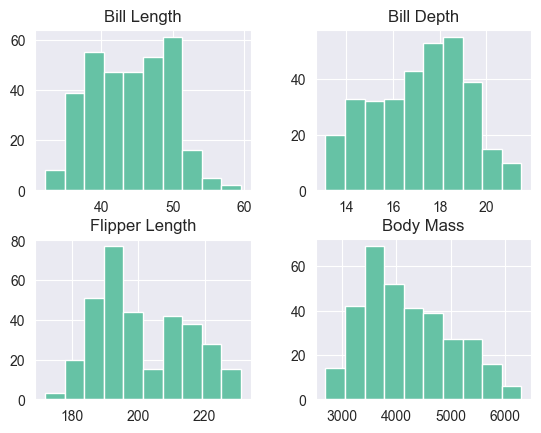

In [409]:
# Inspect histograms for all numerical columns
df.hist()
sns.set_style('darkgrid')
sns.set_palette('Set2')

# Show all plots
plt.show()

- All numerical groups have normal distributions and no noticeable paterns, except for a possible bimodal distribution of flipper length. This likely due to variations in the species.

### Flipper Length Distribution Analysis

Text(0.5, 1.0, 'Distribution of Flipper Length')

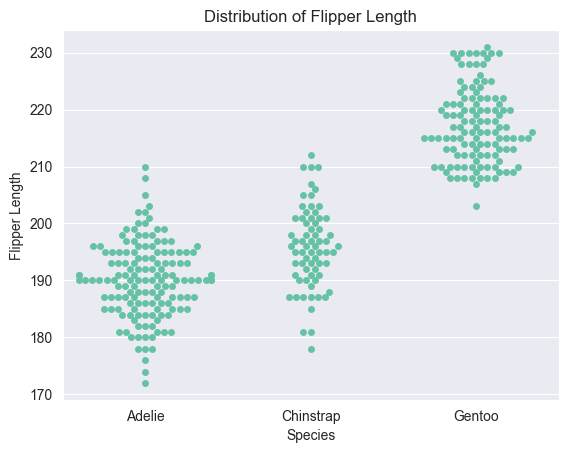

In [410]:
#Analyze flipper length distribution
sns.swarmplot(y='Flipper Length',x='Species', data=df)
plt.title(f'Distribution of Flipper Length')

- Bimodal distribution of flipper length is due to Gentoo typically having a longer flipper than Chinstrap or Adelie.

## Value Counts of Categories
- Display the value counts of the object columns using histograms

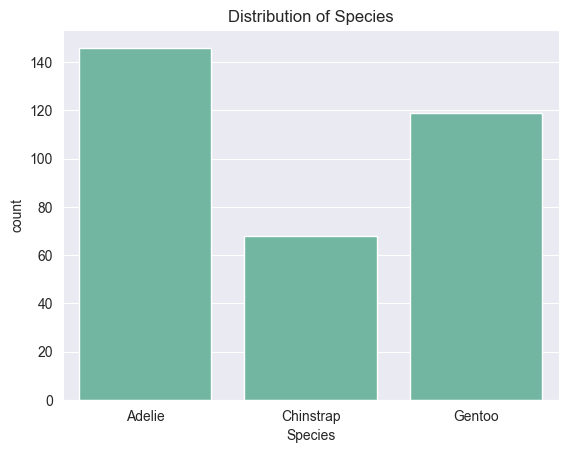

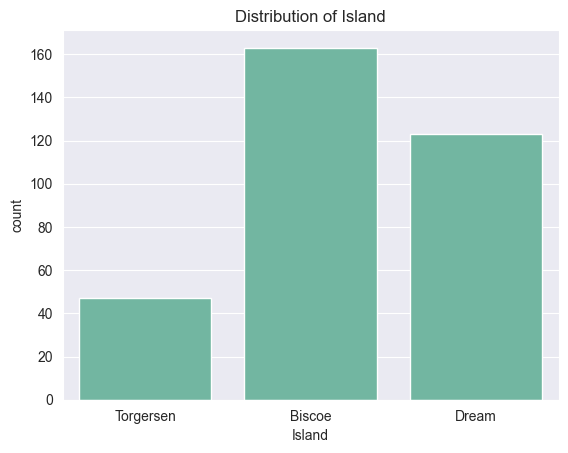

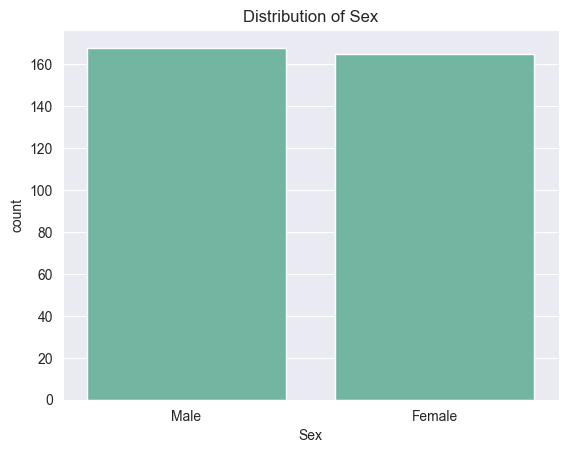

In [411]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df, )
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

- There are three species in the dataset: Adelie, Gentoo, and Chinstrap. 
- There are three islands in the dataset: Torgerson, Biscoe, and Dream.
- There is a relatively equal split of male and female data points in the dataset.

## Compare Characteristics vs Sex for each Species
- Look at the variations in the characteristics between male and female. Use boxplots to show distribution of characteristic values for each sex. 

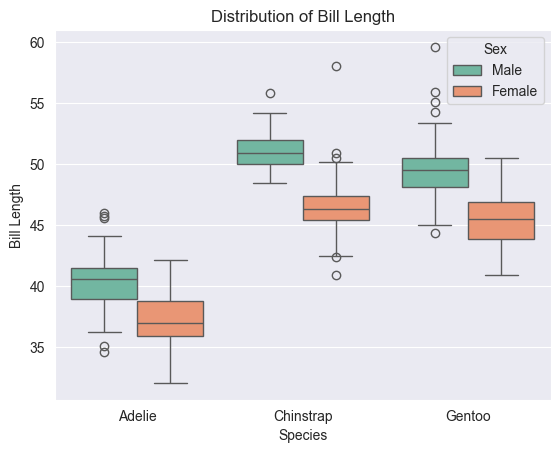

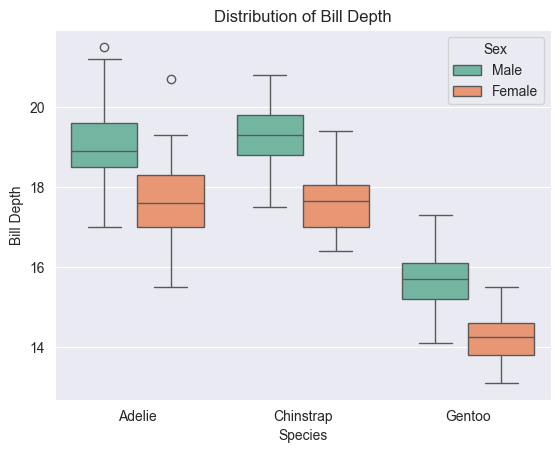

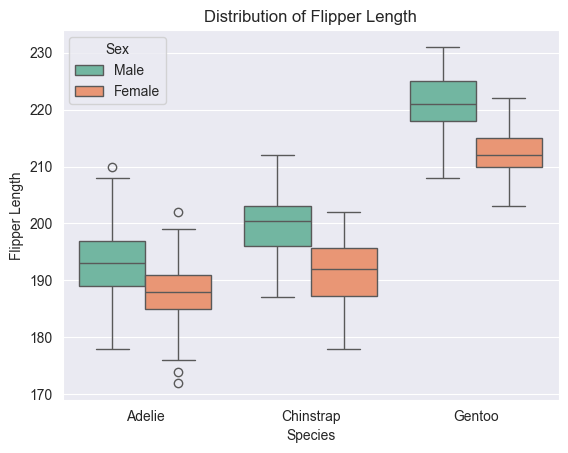

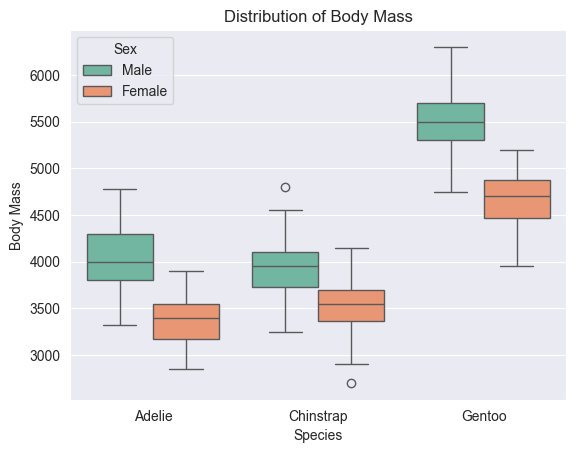

In [412]:
#Characteristics of species vs sex
for col in df.select_dtypes(include=['float64', 'category']).columns:
    # Display count plot
    sns.boxplot(x=df.Species,y=col,hue=df.Sex, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

- Males have higher body mass and larger bills and flippers than females for all species.

## Compare Characteristics vs Species and Island
- Look at how characteristics vary from species to species and if there is any variation within species between islands. Use swarm plot to show species and island distribution for each characteristic.

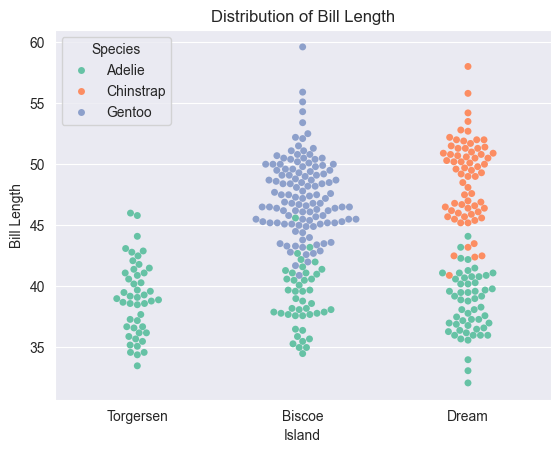

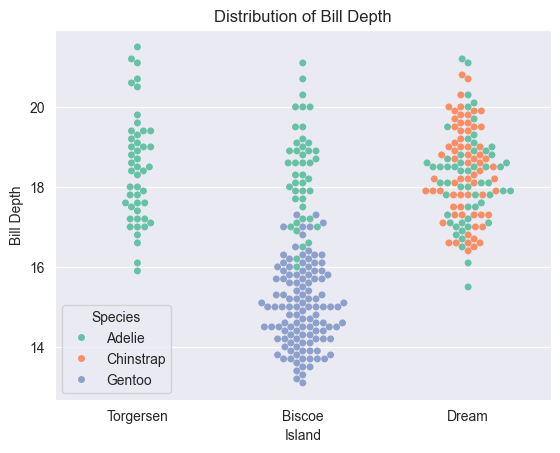

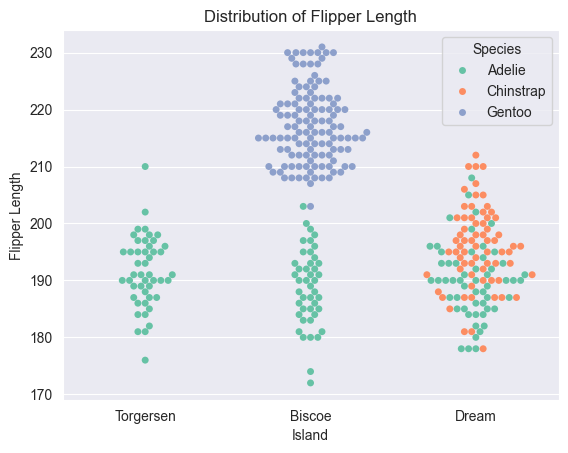

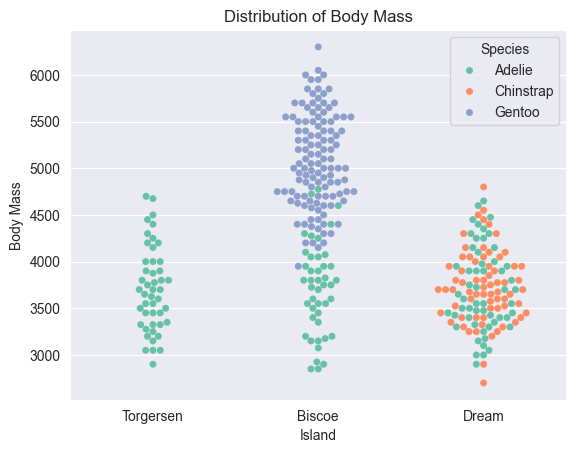

In [413]:
#Characteristics of species vs island
for col in df.select_dtypes(include=['float64', 'category']).columns:
    # Display count plot
    sns.swarmplot(y=col,x=df.Island, data=df, hue=df.Species)
    plt.title(f'Distribution of {col}')
    plt.show()

- Adleie penguins are found on all three islands, while Gentoo are ony on Biscoe and Chinstrap are only on Dream.
- Gentoo and Chinstrap has similar bill length that is longer than Adelie.
- Adelie and Chinstrap have similar bill depth that is deeper than Gentoo.
- Gentoo have longer flippers compared to shorter flippers of Adelie and Chinstrap. 
- Adelie and Chinstrap have similar body mass, while Gentoo are heavier. 
- Gentoo are heavier with long flippers and long, shallow bills.
- Chinstrap and lighter with short flippers and long, thick bills.
- Adelie are lighter with short flippers and short, thick bills.

## Correlation of Characteristics
- Use heatmap to show correlation matrix between characteristics.

In [414]:
correlation_matrix=df.select_dtypes(include=['number']).corr()

correlation_matrix

,Bill Length,Bill Depth,Flipper Length,Body Mass
Bill Length,1.000000,-0.228626,0.653096,0.589451
Bill Depth,-0.228626,1.000000,-0.577792,-0.472016
Flipper Length,0.653096,-0.577792,1.000000,0.872979
Body Mass,0.589451,-0.472016,0.872979,1.000000


<Axes: >

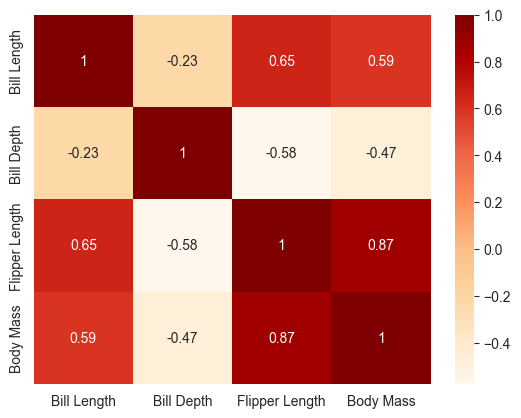

In [415]:
sns.heatmap(correlation_matrix,annot=True, cmap="OrRd")

- Not very useful due to combining species characteristics.
- Create more useful correlations by splitting out each species.

In [416]:
#Create new column
df['Island Species'] = df['Island'].map(str) + ' ' + df['Species'].map(str)
#Create new datasets for each species
df_adelie=df[df['Species']=='Adelie']
df_gentoo=df[df['Species']=='Gentoo']
df_chinstrap=df[df['Species']=='Chinstrap']


### Adelie Characteristic Correlation

                Bill Length  Bill Depth  Flipper Length  Body Mass
Bill Length        1.000000    0.385813        0.332274   0.544276
Bill Depth         0.385813    1.000000        0.310897   0.580156
Flipper Length     0.332274    0.310897        1.000000   0.464854
Body Mass          0.544276    0.580156        0.464854   1.000000


<Axes: >

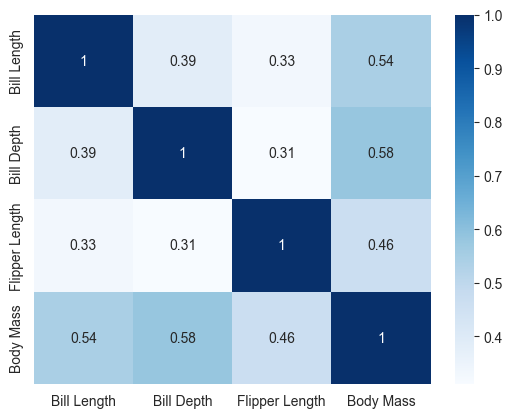

In [417]:
#Adelie Correlation
adelie_correlation_matrix=df_adelie.select_dtypes(include=['number']).corr()

print(adelie_correlation_matrix)

sns.heatmap(adelie_correlation_matrix,annot=True, cmap="Blues")

### Gentoo Characteristic Correlation

                Bill Length  Bill Depth  Flipper Length  Body Mass
Bill Length        1.000000    0.654023        0.664205   0.666730
Bill Depth         0.654023    1.000000        0.710642   0.722967
Flipper Length     0.664205    0.710642        1.000000   0.711305
Body Mass          0.666730    0.722967        0.711305   1.000000


<Axes: >

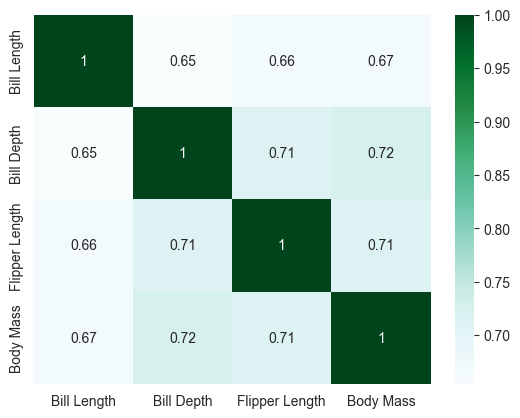

In [418]:
#Gentoo Correlation
gentoo_correlation_matrix=df_gentoo.select_dtypes(include=['number']).corr()

print(gentoo_correlation_matrix)

sns.heatmap(gentoo_correlation_matrix,annot=True, cmap="BuGn")


### Chinstrap Characteristic Correlation

                Bill Length  Bill Depth  Flipper Length  Body Mass
Bill Length        1.000000    0.653536        0.471607   0.513638
Bill Depth         0.653536    1.000000        0.580143   0.604498
Flipper Length     0.471607    0.580143        1.000000   0.641559
Body Mass          0.513638    0.604498        0.641559   1.000000


<Axes: >

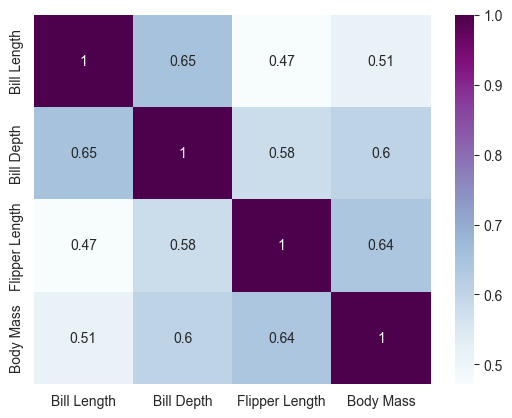

In [419]:
#Chinstrap Correlation
chinstrap_correlation_matrix=df_chinstrap.select_dtypes(include=['number']).corr()

print(chinstrap_correlation_matrix)

sns.heatmap(chinstrap_correlation_matrix,annot=True, cmap="BuPu")

- Looking at each species individually there is less correlation for any of the characterisics than with all species combined.
- The strongest correlation between characteristics is between bill depth and flipper length and body mass in Gentoo penguins. However these correlations were still on .71 and .72.

## Correlation Visualizations
- Use pairplots and scatterplots to show visually the correlations between characteristics for each species. Also use pairplot to show the variation in characteristics between islands for the Adelie species using the new 'Island Species' column.

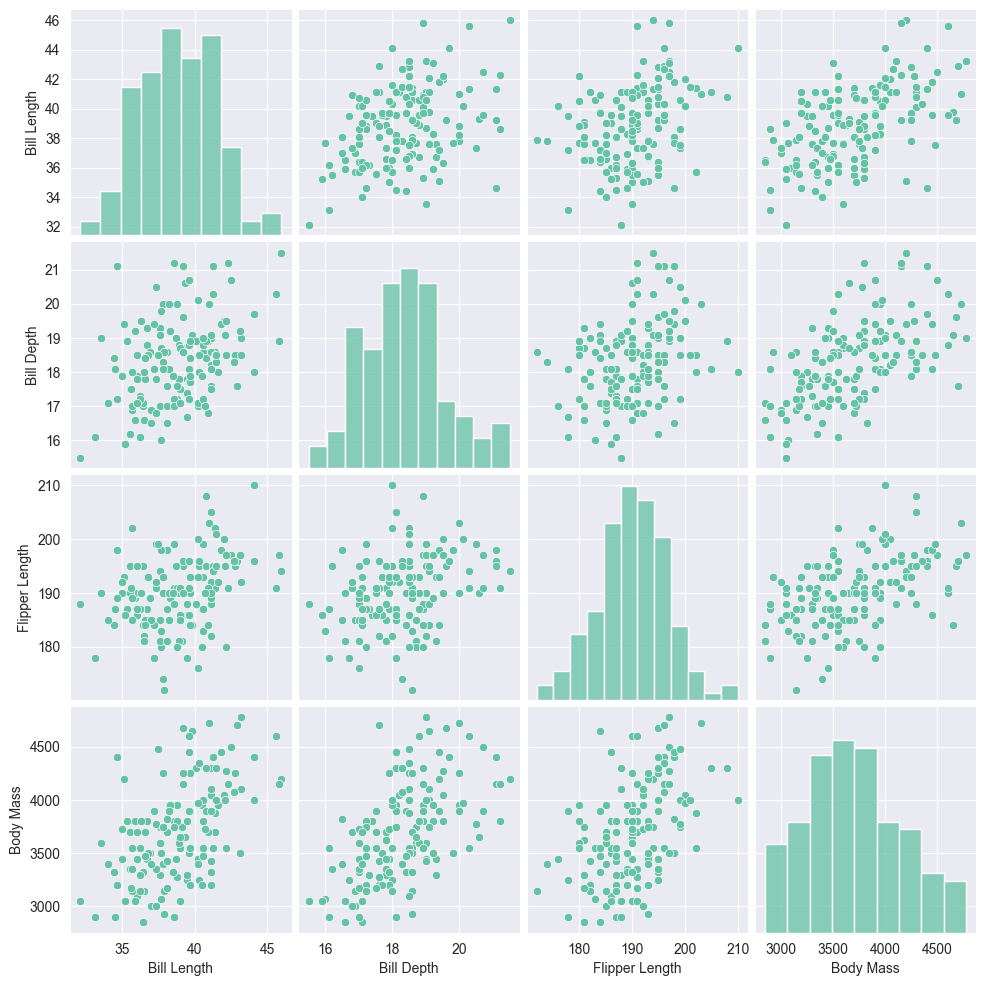

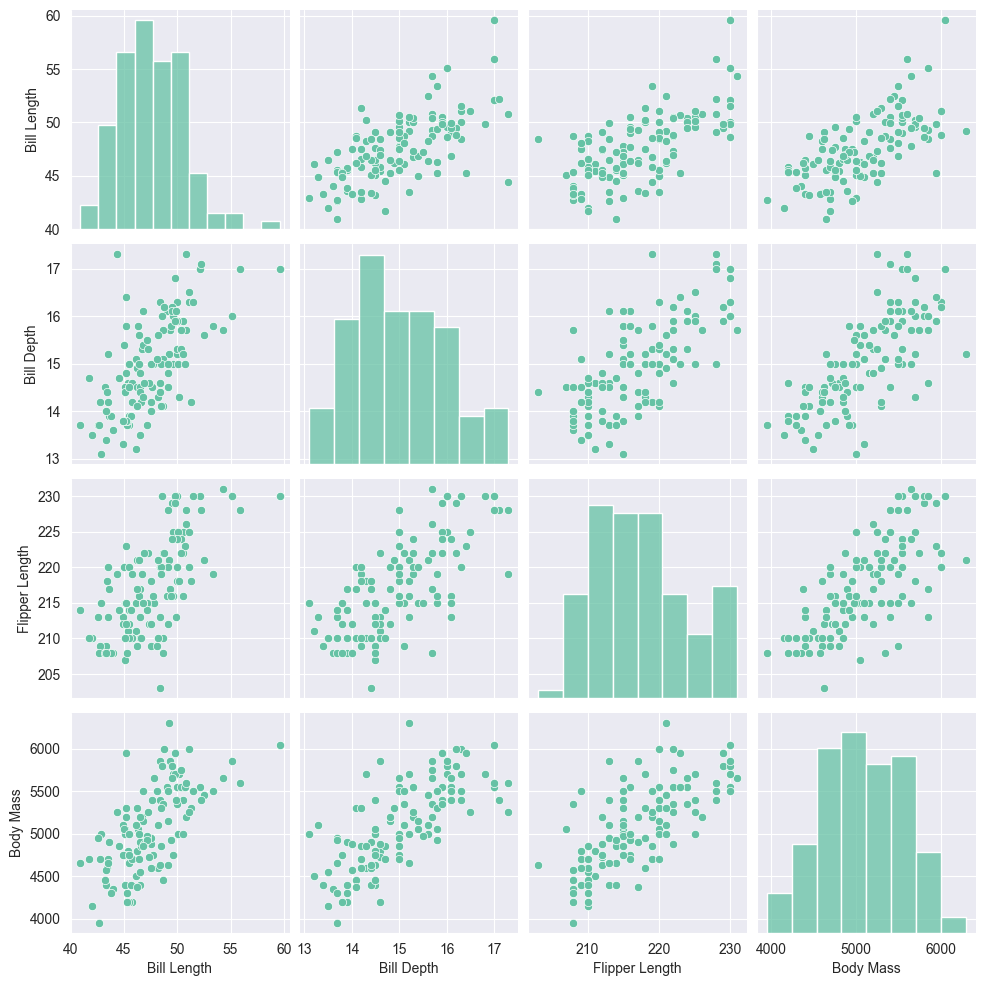

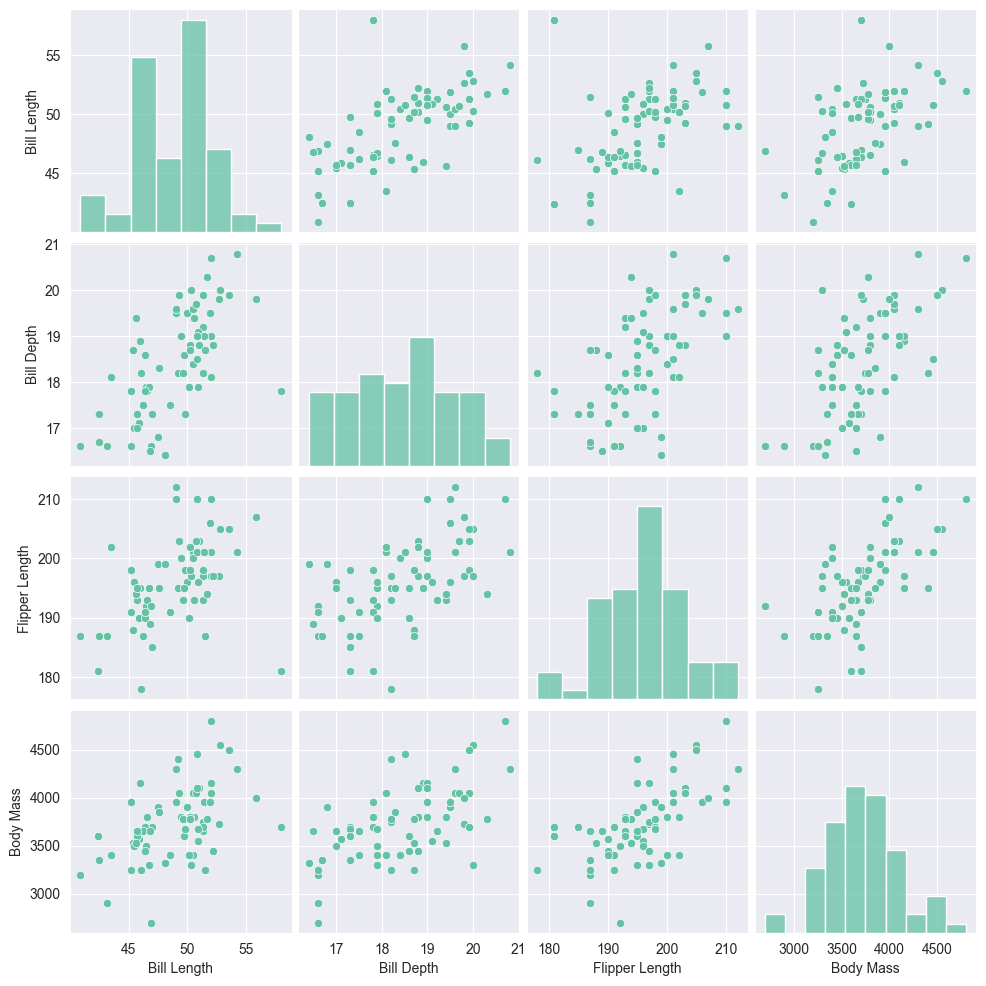

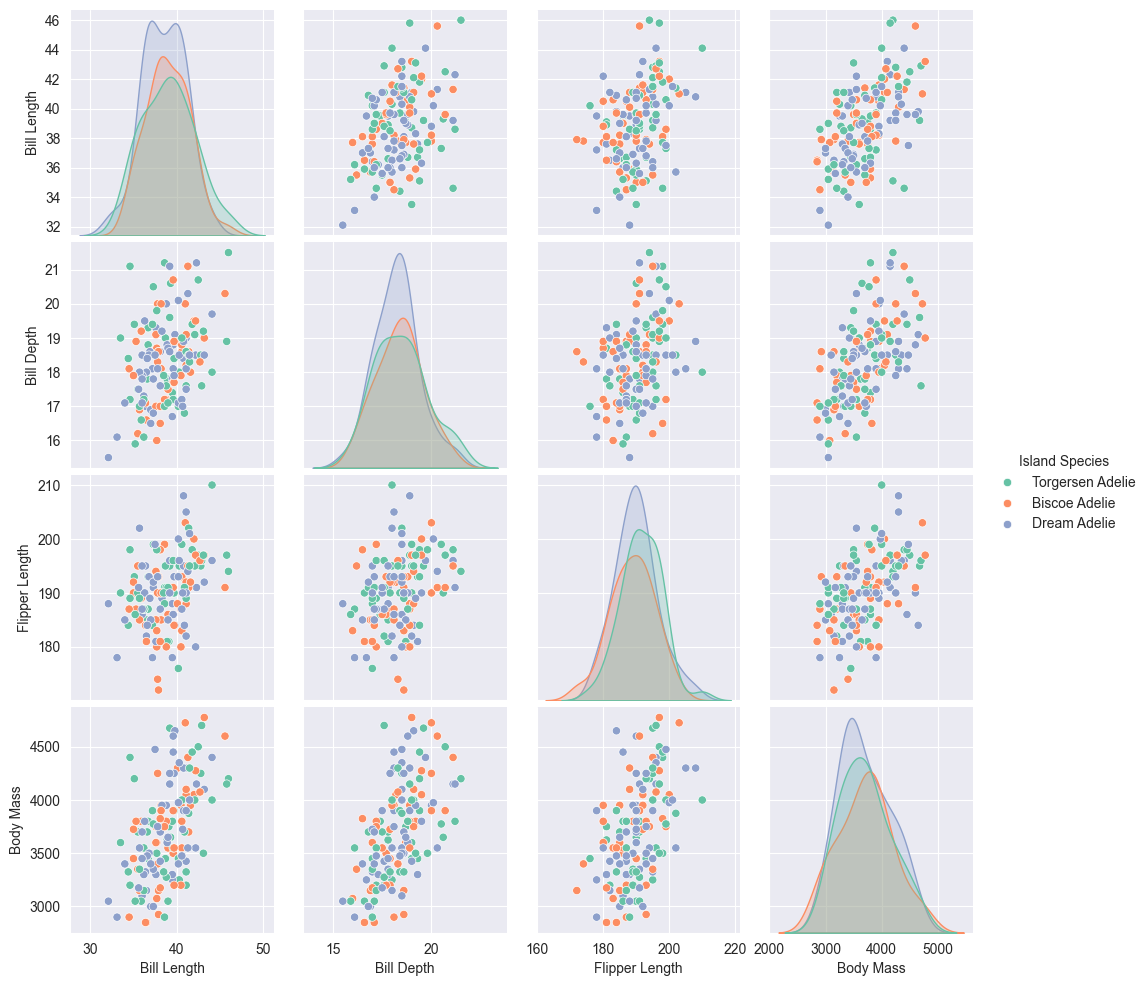

In [420]:

# Initial Visualizations
sns.pairplot(df_adelie)
sns.pairplot(df_gentoo)
sns.pairplot(df_chinstrap)

# Adelie Visualization vs Island
sns.pairplot(df_adelie,hue='Island Species')

plt.show()

- Each of the pair plots show visually what we saw in the heatmaps. There are no strong linear correlations of characteristics for any of the species. 
- The Adelie 'Island Species' pair plot shows that there is no variation bewtween characteristics that is specific to any one island. 